# Desafío - Máquinas de Soporte Vectorial

Nombre: __Hugo Zúñiga__

Profesor: Josué Fredes

Generación: __G4__


* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad. 
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la sección correspondiente.
___

## Descripción

Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una célula mamaria. Para más detalles técnicos asociados a la base de datos, pueden hacer click en el link.

## Ejercicio 1: Preparar el ambiente de trabajo

* Importe todas las librerías a utilizar.
* Fije los parámetros de los gráficos con `plt.rcParams`
* Excluya las columnas `id` y `Unnamed: 32` de la base de datos.
* Recodifique el vector objetivo `diagnosis` a numérico para poder procesarlo posteriormente.

In [1]:
# importo librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# librerías a utilizar
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# parámetros para gráficos
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

# para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importo la bbdd
df = pd.read_csv('breast_cancer.csv')
df.sample(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
89     861598         B        14.64         15.24           95.77      651.9   
526  91813701         B        13.46         18.75           87.44      551.1   
546    922577         B        10.32         16.35           65.31      324.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
566          0.08455           0.10230         0.09251             0.053020   
567          0.11780           0.27700         0.35140             0.152000   
89           0.11320           0.13390         0.09966             0.070640   
526          0.10750           0.11380         0.04201             0.031520   
546          0.09434           0.04994         0.01012             0.005495   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
566  ...          34.12           126.70      1124.0            0.1139   
567  ...          39.42           184.60      1821.0            0.1650   
89   ...          18.24           109.40       803.6            0.1277   
526  ...          25.16           101.90       719.8            0.1624   
546  ...          21.77            71.12       384.9            0.1285   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
566            0.30940          0.34030               0.14180          0.2218   
567            0.86810          0.93870               0.26500          0.4087   
89             0.30890          0.26040               0.13970          0.3151   
526            0.31240          0.26540               0.14270          0.3518   
546            0.08842          0.04384               0.02381          0.2681   

     fractal_dimension_worst  Unnamed: 32  
566                  0.07820          NaN  
567                  0.12400          NaN  
89                   0.08473          NaN  
526                  0.08665          NaN  
546                  0.07399          NaN  

[5 rows x 33 columns]

In [3]:
# borro las columnas sobrantes
df = df.drop(columns=['id','Unnamed: 32'])
df.sample(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
208         B        13.11         22.54           87.02      529.4   
484         B        15.73         11.28          102.80      747.2   
509         M        15.46         23.95          103.80      731.3   
227         B        15.00         15.51           97.45      684.5   
245         B        10.48         19.86           66.72      337.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
208          0.10020           0.14830         0.08705              0.05102   
484          0.10430           0.12990         0.11910              0.06211   
509          0.11830           0.18700         0.20300              0.08520   
227          0.08371           0.10960         0.06505              0.03780   
245          0.10700           0.05971         0.04831              0.03070   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
208         0.1850  ...         14.55          29.16            99.48   
484         0.1784  ...         17.01          14.20           112.50   
509         0.1807  ...         17.11          36.33           117.70   
227         0.1881  ...         16.41          19.31           114.20   
245         0.1737  ...         11.48          29.46            73.68   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
208       639.3            0.1349             0.4402           0.3162   
484       854.3            0.1541             0.2979           0.4004   
509       909.4            0.1732             0.4967           0.5911   
227       808.2            0.1136             0.3627           0.3402   
245       402.8            0.1515             0.1026           0.1181   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
208               0.11260          0.4128                  0.10760  
484               0.14520          0.2557                  0.08181  
509               0.21630          0.3013                  0.10670  
227               0.13790          0.2954                  0.08362  
245               0.06736          0.2883                  0.07748  

[5 rows x 31 columns]

In [4]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
# refactorizo el vector objetivo
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [1, -1])
df.sample(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
355          1       12.560         19.07           81.92      485.8   
176          1        9.904         18.06           64.60      302.4   
285          1       12.580         18.40           79.83      489.0   
567         -1       20.600         29.33          140.10     1265.0   
522          1       11.260         19.83           71.30      388.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
355          0.08760           0.10380        0.103000             0.043910   
176          0.09699           0.12940        0.130700             0.037160   
285          0.08393           0.04216        0.001860             0.002924   
567          0.11780           0.27700        0.351400             0.152000   
522          0.08511           0.04413        0.005067             0.005664   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
355         0.1533  ...         13.37          22.43            89.02   
176         0.1669  ...         11.26          24.39            73.07   
285         0.1697  ...         13.50          23.08            85.56   
567         0.2397  ...         25.74          39.42           184.60   
522         0.1637  ...         11.93          26.43            76.38   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
355       547.4            0.1096            0.20020         0.238800   
176       390.2            0.1301            0.29500         0.348600   
285       564.1            0.1038            0.06624         0.005579   
567      1821.0            0.1650            0.86810         0.938700   
522       435.9            0.1108            0.07723         0.025330   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
355              0.092650          0.2121                  0.07188  
176              0.099100          0.2614                  0.11620  
285              0.008772          0.2505                  0.06431  
567              0.265000          0.4087                  0.12400  
522              0.028320          0.2557                  0.07613  

[5 rows x 31 columns]

In [6]:
df.shape

(569, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

## Ejercicio 2: Visualizando la distribución de los atributos

* Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
* Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

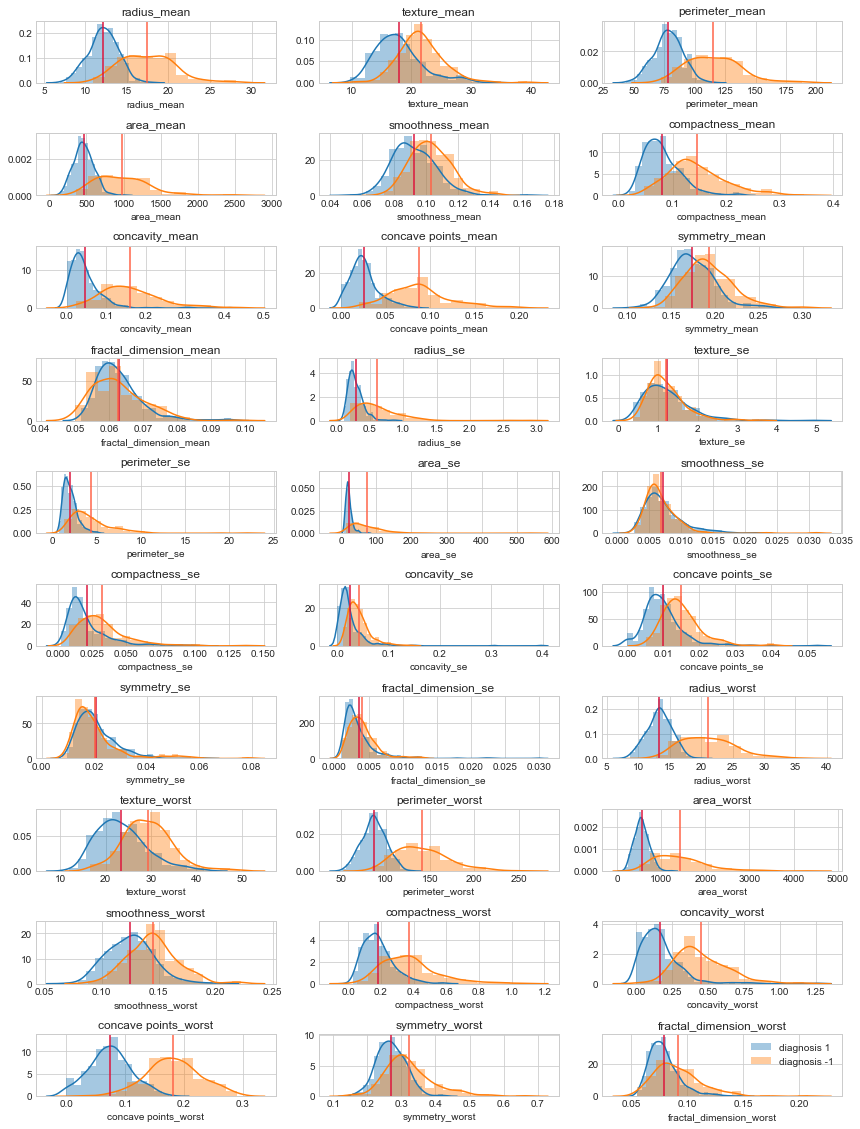

In [14]:
rows = 11; cols = 3;
plt.figure(figsize=(12,17))
for index, v in enumerate(df.columns):
    if v != 'diagnosis':
        plt.subplot(rows, cols, index)
        sns.distplot(df[df['diagnosis'] == 1][v], label='diagnosis 1')
        sns.distplot(df[df['diagnosis'] == -1][v], label='diagnosis -1')
        plt.axvline(np.mean(np.mean(df[df['diagnosis'] == 1][v])), color='crimson')
        plt.axvline(np.mean(np.mean(df[df['diagnosis'] == -1][v])), color='tomato')
        plt.title(v)
plt.tight_layout()
plt.legend()

__Comentario:__ Podemos observar similitud en texture_mean, smoothness_mean, smoothness_se, concave points_se y texture_worst. 

## Ejercicio 3: Estimando el porcentaje de overlap en los atributos

* Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvía es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.

* El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

```python
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison
            range=[empirical_lower_bound, empirical_upper_bound]
)
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_-1"])
    intersection = np.true_divide(np.sum(get_minima),
np.sum(tmp_hist_holder["h_-1"]))
    return intersection
```

* La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.

* Utilizando la función, genere un dataframe donde almacenará el nombre del atributo y su porcentaje. Ordene este dataframe de forma descendente y preserve.

In [15]:
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min())
    # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max())
    # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison
            range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_-1"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_-1"]))
    return intersection

In [16]:
histogram_overlap(df, 'radius_mean', 'diagnosis')

0.3113207547169811

In [17]:
var, p = [],[]
for i, v in enumerate(df.columns):
    if v != 'diagnosis':
        var.append(v)
        p.append(histogram_overlap(df, v, 'diagnosis'))

In [18]:
df_p = pd.DataFrame({'atributo':var, 'porcentaje':p}).sort_values(by='porcentaje', ascending=False)
df_p.head(10)

atributo  porcentaje
19     fractal_dimension_se    1.000000
14            smoothness_se    0.995283
9    fractal_dimension_mean    0.990566
18              symmetry_se    0.957547
11               texture_se    0.924528
15           compactness_se    0.882075
4           smoothness_mean    0.877358
8             symmetry_mean    0.858491
17        concave points_se    0.853774
29  fractal_dimension_worst    0.830189

## Ejercicio 4: Selección del modelo por GridSearchCV

* Entrene una serie de modelos `SVC` con los siguientes hiperparámetros:

    - `C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]`
    - `gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]`
    - Validaciones cruzadas: 10.
    
* Genere un heatmap en base a los puntajes estimados con `GridSearchCV`.

_tip_ : Vea cómo acceder a la llave `mean_test_score` en el diccionario `cv_results_`.

```
Digresión: Un par de elementos a considerar en la implementación de GridSearchCV
Si trabajamos con , tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos y y_train a nuestro objeto instanciado y preservando X_test e y_test como una muestra de validación externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.
El objeto creado con sklearn.model_selection.GridSearchCV sigue la misma funcionalidad de cualquier método de estimación de scikit-learn , con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:
sklearn.model_selection.GridSearchCV.cv_results_ devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo:
split* Indicará la métrica específica en cada validacieon cruzada y combinación de hiperparámetros.
*_time Indicará el tiempo de ejecución en cada modelo.
Por lo general trabajaremos con mean_test_score y mean_train_score que representa la media de CV para cada combinación de hiperparámetros.
sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un modelo listo para entrenar con la mejor combinación de hiperparámetros.
sklearn.model_selection.GridSearchCV.best_score_ devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá Accuracy , si es un problema de regresión devolverá MSE .
```

* Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.

In [19]:
# genero vectores de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,'radius_mean':'fractal_dimension_worst'],
                                                    df['diagnosis'],
                                                    test_size=.33,
                                                    random_state=16254)

In [20]:
# Hiperparámetros
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [21]:
parametros = {'C':c, 'gamma':gamma}
parametros

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [22]:
model = GridSearchCV(SVC(kernel='rbf'), param_grid=parametros, cv=10)

In [23]:
# entreno
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
model.best_params_

{'C': 1, 'gamma': 0.0001}

In [25]:
model.best_score_

0.9448818897637795

In [26]:
model.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
model.param_grid

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [28]:
cv_param = model.cv_results_['mean_test_score'].reshape(8,7)

In [29]:
model.param_grid['C']

[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [30]:
model.param_grid['gamma']

[1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]

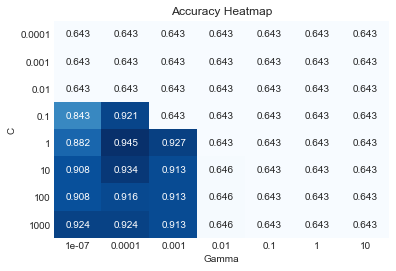

In [31]:
sns.heatmap(cv_param, annot=True, cmap='Blues', 
            yticklabels=model.param_grid['C'], 
            xticklabels=model.param_grid['gamma'],
            fmt=".3", cbar=False)
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap');

__Comentario:__ Con esto podemos ver que _C_ entre $0.1$ y $1000$ presenta un desempeño eficiente. A su vez, _Gamma_ entre $0.0000001$ y $0.001$.
El mejor desempeño se encuentra en `C=1` y `Gamma=0.0001` con un 94.5%.

## Ejercicio 5: Validación del modelo en el hold-out sample

* Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. 
* Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. 
* Comente en qué casos el modelo presenta un desempeño deficiente.

In [36]:
# genero las predicciones con el mejor modelo
model_2 = SVC(kernel='rbf', C=1, gamma=0.0001).fit(X_train, y_train)
yhat = model_2.predict(X_test)
# muestro las métricas de desempeño
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.90      0.95      0.92        76
           1       0.96      0.93      0.95       112

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188



__Comentarios:__ Podemos ver que el modelo presenta un desempeño deficiente cuando llevamos el hiperparámetro _C_ con valores que tienden a $0$. Al contrario, cuando llevamos _Gamma_ a valores cercanos a $1$. 

## Ejercicio (opcional): Depuración de atributos

* Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
* Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

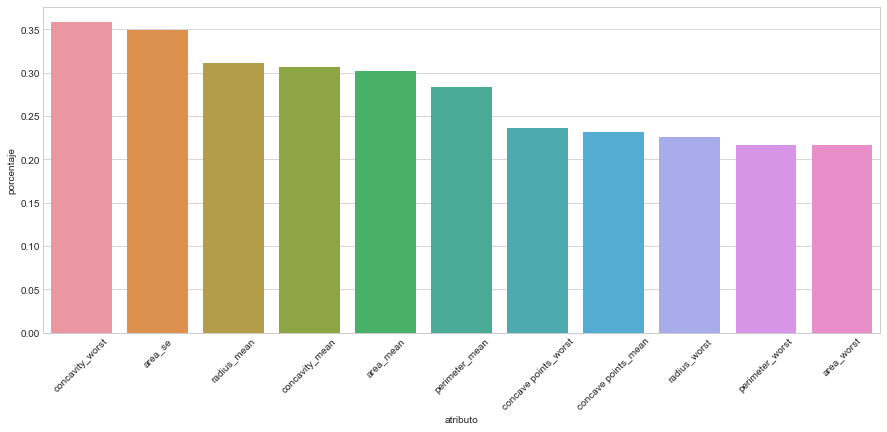

In [63]:
# muestro los porcentajes menores a .45
df_over = df_p[df_p['porcentaje']<.45]
plt.figure(figsize=(15,6))
sns.barplot(x='atributo', y='porcentaje', data=df_over)
plt.xticks(rotation=45)

In [69]:
atributos = list(df_over.atributo)
atributos

['concavity_worst',
 'area_se',
 'radius_mean',
 'concavity_mean',
 'area_mean',
 'perimeter_mean',
 'concave points_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [72]:
# Refactorizamos los vectores de entrenamiento
X_train_2 = X_train.loc[:,atributos]
X_test_2 = X_test.loc[:,atributos]

In [75]:
X_train_2.shape[0] - X_train.shape[0]

0

In [76]:
X_test_2.shape[0] - X_test.shape[0]

0

In [77]:
# Hiperparámetros
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]

In [78]:
parametros = {'C':c, 'gamma':gamma}
parametros

{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [79]:
model_3 = GridSearchCV(SVC(kernel='rbf'), param_grid=parametros, cv=10)

In [80]:
# entreno
model_3.fit(X_train_2, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
cv_param_3 = model_3.cv_results_['mean_test_score'].reshape(8,7)

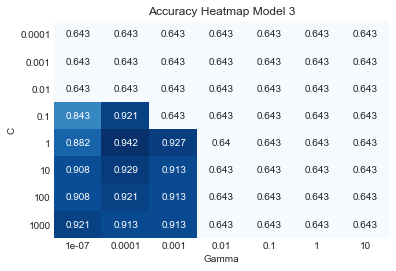

In [82]:
sns.heatmap(cv_param_3, annot=True, cmap='Blues', 
            yticklabels=model_3.param_grid['C'], 
            xticklabels=model_3.param_grid['gamma'],
            fmt=".3", cbar=False)
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Accuracy Heatmap Model 3');

In [83]:
# genero las predicciones con el mejor modelo
model_3 = SVC(kernel='rbf', C=1, gamma=0.0001).fit(X_train_2, y_train)
yhat_3 = model_3.predict(X_test_2)
# muestro las métricas de desempeño
print(classification_report(y_test, yhat_3))

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92        76
           1       0.95      0.93      0.94       112

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188



__Comentario:__ Obtuvimos resultados muy similares y nos entrega el mejor desempeño con los mismos hiperparámetros.